## From the attached picture, segment out the inner mouth part only (showing uvula & its nearby area). The output should exclude the teeth, tongue, lips or other outer part of the face/mouth.

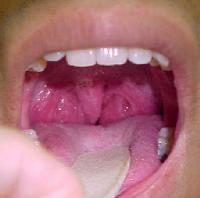

In [1]:
# Importing libraries
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# function to plot n images using subplots
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image,caption in zip(axes, images, captions):
        ax.imshow(image, cmap)
        ax.set_title(caption)

In [30]:
# Creating a function to show segmented image

def segment(image):
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #rgb image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #grayscale image
    
    #Otsu Threshold for segmenting throat
    ret2,otsu_threshold = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    #plotting the images before and after extracting throat
    m = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if otsu_threshold[i,j]<0.1:
                m[i,j,:]=rgb[i,j,:]
            else:
                continue
    segmented_image = m/255

    return plot_image([rgb, segmented_image], cmap = None, captions = ['Original Image','Segmented Image'])

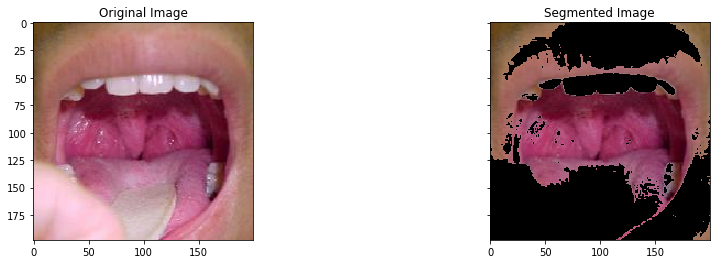

In [31]:
image1 = cv2.imread('M1.jpeg')

segment(image1)

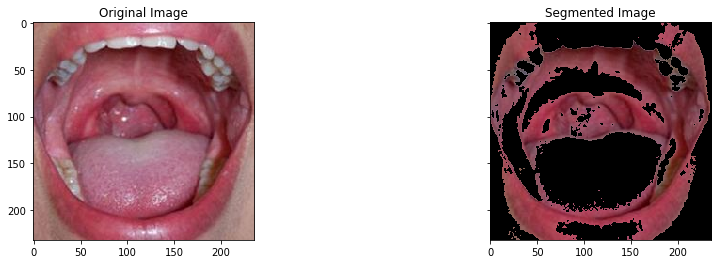

In [32]:
image2 = cv2.imread('M2.jpeg')

segment(image2)

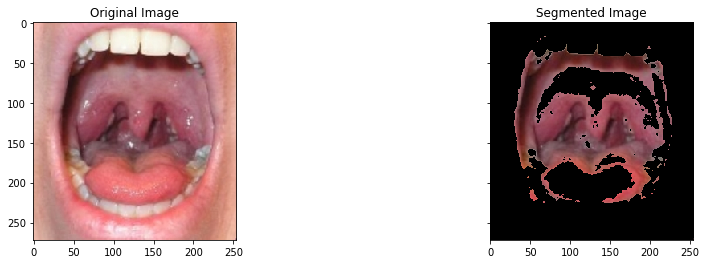

In [33]:
image1 = cv2.imread('M3.jpeg')

segment(image1)